In [21]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging

In [22]:
training_set = 800

def load_data():
    data = np.loadtxt("../data/Cardiovascular_Disease_Dataset.csv", delimiter=',', skiprows=1)

    X = data[:,1:-1]
    y = data[:,-1]
    return X, y

x_tmp, y_tmp = load_data()
X_train = x_tmp[:training_set]
X_test = x_tmp[training_set:]
y_train = np.expand_dims(y_tmp[:training_set], axis=1)
y_test = np.expand_dims(y_tmp[training_set:], axis=1)

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_norm = norm_l(X_train)
X_test_norm = norm_l(X_test)

In [23]:
model = Sequential(
    [
        tf.keras.Input(shape=(12,)),
        Dense(12, activation='relu', name = 'layer1'),
        Dense(24, activation='relu', name = 'layer2'),
        Dense(1, activation='sigmoid', name = 'layer3')
     ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
)

res = model.fit(
    X_norm,
    y_train,            
    epochs=100,
)

print(res)


Epoch 1/100


25/25 [==============================] - 0s 596us/step - loss: 0.3879
Epoch 2/100
25/25 [==============================] - 0s 615us/step - loss: 0.1627
Epoch 3/100
25/25 [==============================] - 0s 558us/step - loss: 0.1098
Epoch 4/100
25/25 [==============================] - 0s 538us/step - loss: 0.0775
Epoch 5/100
25/25 [==============================] - 0s 483us/step - loss: 0.0695
Epoch 6/100
25/25 [==============================] - 0s 506us/step - loss: 0.0640
Epoch 7/100
25/25 [==============================] - 0s 530us/step - loss: 0.0550
Epoch 8/100
25/25 [==============================] - 0s 511us/step - loss: 0.0507
Epoch 9/100
25/25 [==============================] - 0s 432us/step - loss: 0.0500
Epoch 10/100
25/25 [==============================] - 0s 514us/step - loss: 0.0420
Epoch 11/100
25/25 [==============================] - 0s 525us/step - loss: 0.0399
Epoch 12/100
25/25 [==============================] - 0s 491us/step - loss: 0.0321
Epoch 13/100
25/25 [=====

In [31]:
predictions = model.predict(X_test_norm)
predictions.squeeze()

false_positive = 0
false_negative = 0
for i, p in enumerate(predictions):
    if (p > 0.5):
        p = 1
    else:
        p = 0

    if (p == 1 and y_test[i] == 0):
        print(X_test[i], y_test[i])
        false_positive += 1

    if (p == 0 and y_test[i] == 1):
        print(X_test[i], y_test[i])
        false_negative += 1
    # print("Result for normalized:", p, "vs actual:", y_train[i])

m = len(predictions)
print("Total false positives:", false_positive)
print("Total false negatives:", false_negative)
print("Total predictions:", m)
print("Error rate:", (false_negative + false_positive) / m * 100)

7/7 [==============================] - 0s 638us/step
[ 25.    1.    2.  142.  194.    0.    0.  142.    1.    0.5   1.    2. ] [1.]
[ 54.    1.    2.  138.  139.    0.    0.  176.    1.    0.2   1.    0. ] [0.]
[ 79.    1.    2.  133.  303.    1.    1.  122.    1.    1.8   1.    0. ] [1.]
[ 58.    0.    0.  129.  465.    0.    0.  135.    1.    2.6   2.    0. ] [0.]
[ 51.    0.    2.  198.  436.    1.    1.   78.    1.    2.3   1.    1. ] [0.]
[ 39.    1.    0.  143.  146.    0.    1.  170.    0.    0.4   1.    0. ] [0.]
[ 64.    0.    0.  188.  288.    1.    0.  119.    0.    1.2   1.    2. ] [1.]
[ 31.    1.    0.  143.  232.    0.    0.  198.    1.    5.4   2.    1. ] [1.]
Total false positives: 4
Total false negatives: 4
Total predictions: 200
Error rate: 4.0


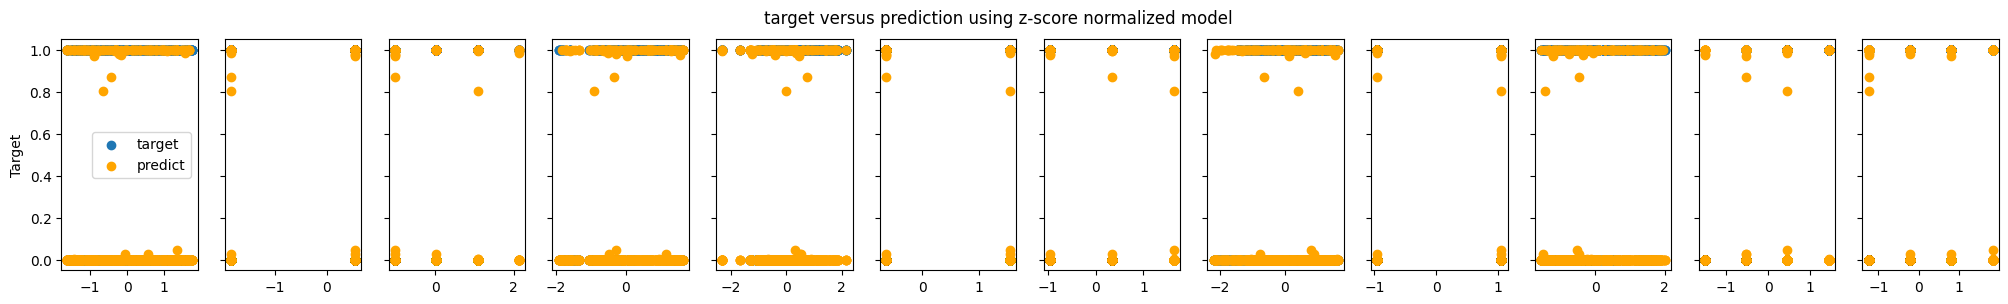

In [30]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i, p in enumerate(predictions):
    yp[i] = p

    # plot predictions and targets versus original features    
fig, ax = plt.subplots(1,12,figsize=(25, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, label = 'target')
    # ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:,i], yp, color="orange", label = 'predict')
ax[0].set_ylabel("Target"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()